# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv(".env")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin AND Bitcoin',
                                  language='en',
                                  page_size=100,
                                  sort_by='relevancy'
                                 )

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum AND Ethereum',
                                  language='en',
                                  page_size=100,
                                  sort_by='relevancy')

In [6]:
# Define function to create dataframes from news api pull
def create_df(news):
    articles = []
    for article in news:
        try:
            text = article['content']
            articles.append({
                'text': text,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
# Create dataframes for each topic
btc_df = create_df(btc_news['articles'])
btc_df.dropna(inplace=True)

eth_df = create_df(eth_news['articles'])
eth_df.dropna(inplace=True)

btc_df.head()

,text
0,"Like Dogecoin devotees, the mayor of Reno, and..."
1,Filed under:\r\nThe supply chain attack has re...
2,image copyrightGetty Images\r\nThe gang behind...
3,To get a roundup of TechCrunchs biggest and mo...
4,While retail investors grew more comfortable b...


In [8]:
# Create the Bitcoin sentiment scores DataFrame

# Sentiment scores dictionaries
text_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in btc_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
btc_sentiment_df = pd.DataFrame(text_sent)

btc_df = btc_df.join(btc_sentiment_df)

btc_df.columns = ['Article','Compound','Positive','Neutral','Negative']

btc_df.head()

,Article,Compound,Positive,Neutral,Negative
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.822,0.000
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.705,0.184
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.857,0.143
3,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.873,0.000
4,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.000


In [9]:
# Create the ethereum sentiment scores DataFrame

# Sentiment scores dictionaries
text_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in eth_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
eth_sentiment_df = pd.DataFrame(text_sent)

eth_df = eth_df.join(eth_sentiment_df)

eth_df.columns = ['Article','Compound','Positive','Neutral','Negative']

eth_df.head()

,Article,Compound,Positive,Neutral,Negative
0,There are many blockchain platforms competing ...,0.3612,0.075,0.925,0.000
1,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.939,0.061
2,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.000
3,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.810,0.000
4,Representation of the Ethereum virtual currenc...,0.0000,0.000,1.000,0.000


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.091856,0.059140,0.906890,0.033960
std,0.394892,0.070527,0.087044,0.058909
min,-0.827100,0.000000,0.653000,0.000000
25%,-0.044250,0.000000,0.852500,0.000000
50%,0.000000,0.047000,0.919500,0.000000
75%,0.381800,0.092000,1.000000,0.066250
max,0.883400,0.276000,1.000000,0.287000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.00000,100.000000,100.000000
mean,0.140959,0.05511,0.923090,0.021790
std,0.346352,0.06396,0.075528,0.046154
min,-0.812600,0.00000,0.714000,0.000000
25%,0.000000,0.00000,0.870750,0.000000
50%,0.000000,0.04000,0.929500,0.000000
75%,0.401900,0.09000,1.000000,0.000000
max,0.771700,0.20100,1.000000,0.249000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the higher mean positive score (0.091856) vs Ethereum (0.05487)

Q: Which coin had the highest compound score?

A: Ethereum (0.146295) had a higher compound score than Bitcoin (0.091856)

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score (0.276000)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    """Tokenizes text."""

# Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)
    
# Create a list of the words
    sentence = sent_tokenize(clean_text)
    words = []
    for sent in sentence:
        word = word_tokenize(sent)
        words = words + word    
        
# Convert the words to lowercase
    words_lc = [word.lower() for word in words]    
    
# Remove the stop words
    sw = set(stopwords.words('english'))
    words_sw = [word for word in words_lc if word not in sw]
    
# Lemmatize Words into root words
    output = [lemmatizer.lemmatize(word) for word in words_sw]
    
    return output

In [14]:
# Create a new tokens column for bitcoin
btc_df['Tokens'] = [tokenizer(text) for text in btc_df['Article']]
btc_df.head()

,Article,Compound,Positive,Neutral,Negative,Tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.822,0.000,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.705,0.184,"[filed, underthe, supply, chain, attack, reach..."
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.857,0.143,"[image, copyrightgetty, imagesthe, gang, behin..."
3,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.873,0.000,"[get, roundup, techcrunchs, biggest, important..."
4,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.000,"[retail, investor, grew, comfortable, buying, ..."


In [15]:
# Create a new tokens column for ethereum
eth_df['Tokens'] = [tokenizer(text) for text in eth_df['Article']]
eth_df.head()

,Article,Compound,Positive,Neutral,Negative,Tokens
0,There are many blockchain platforms competing ...,0.3612,0.075,0.925,0.000,"[many, blockchain, platform, competing, invest..."
1,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.939,0.061,"[blockchain, infrastructure, startup, heating,..."
2,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.000,"[retail, investor, grew, comfortable, buying, ..."
3,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.810,0.000,"[cent, founded, adfree, creator, network, allo..."
4,Representation of the Ethereum virtual currenc...,0.0000,0.000,1.000,0.000,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('july', 'reuters'), 18),
 (('illustration', 'taken'), 13),
 (('char', 'representation'), 10),
 (('taken', 'june'), 10),
 (('virtual', 'currency'), 8),
 (('representation', 'virtual'), 7),
 (('elon', 'musk'), 7),
 (('illustration', 'picture'), 7),
 (('currency', 'bitcoin'), 6),
 (('char', 'reuters'), 6)]

In [18]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('illustration', 'taken'), 19),
 (('taken', 'june'), 17),
 (('char', 'representation'), 16),
 (('aug', 'reuters'), 13),
 (('representation', 'cryptocurrencies'), 13),
 (('bitcoin', 'ethereum'), 12),
 (('june', 'reutersdado'), 12),
 (('pc', 'motherboard'), 11),
 (('cryptocurrencies', 'bitcoin'), 11),
 (('ethereum', 'dogecoin'), 11)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
big_string = ' '.join(btc_df["Article"])
processed = tokenizer(big_string)
token_count(processed)

[('char', 95), ('bitcoin', 65), ('reuters', 33)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 100), ('ethereum', 40), ('bitcoin', 27)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

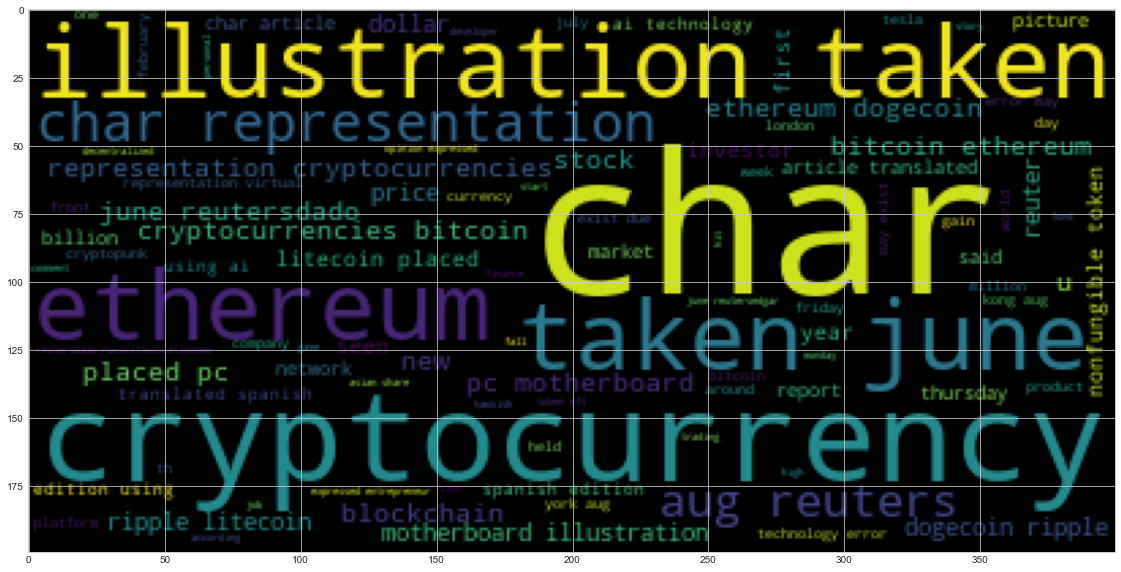

In [23]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [26]:
# Concatenate all of the bitcoin text together
btc_text = ' '.join(btc_df['Article'])
btc_text

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized applica

In [27]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [28]:
# Render the visualization
displacy.render(doc, style='ent')

In [29]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
copyrightGetty Images PERSON
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
SINGAPORE GPE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
REUTERS ORG
Dado Ruvic/Illustration
 PERSON
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL

---

### Ethereum NER

In [30]:
# Concatenate all of the ethereum text together
eth_text = ' '.join(eth_df['Article'])
eth_text

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars] Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars] Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUT

In [31]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [32]:
# Render the visualization
displacy.render(doc, style='ent')

In [33]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
American Express ORG
Monday DATE
Chicago Bulls ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINA

---